# 회귀분석 
    - 회귀분석은 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능 평가

### MAE 
    - 실젯값과 예측값의 차이를 절대값으로 변환하여 평균으로 구한 데이터 
    - 에러의 크기가 그대로 반영 
    - 이상치의 데이터가 존재하면 영향을 크게 받는다. 

### MSE
    - 실젯값과 예측값의 차이를 제곱해서 평균으로 구한 데이터 
    - 실젯값과 예측값의 면적의 합을 의미 
    - 특이값이 존재하면 수치 증가 

### RMSE
    - MSE 값에서 루트를 사용한 데이터
    - 에러에 제곱을 에러가 클구록 그에 따른 가중치가 높이 반영 
    - 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해서 사용 

### MSLE
    - MSE값에 로그를 사용한 데이터 
    - RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 상쇄하기 위해서 사용

### MAPE 
    - MAE를 퍼센트로 표시 
    - 오타가 예측값에서 차지는 정도를 나타냄

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [2]:
california_data = fetch_california_housing()

In [3]:
california_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
df = pd.DataFrame(california_data['data'], 
                  columns=california_data['feature_names'])

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_data['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
california_data['target_names']

['MedHouseVal']

In [8]:
df['value'] = california_data['target']

In [9]:
# 데이터프레임의 정보를 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
# 결측치의 개수를 확인 
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
value         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

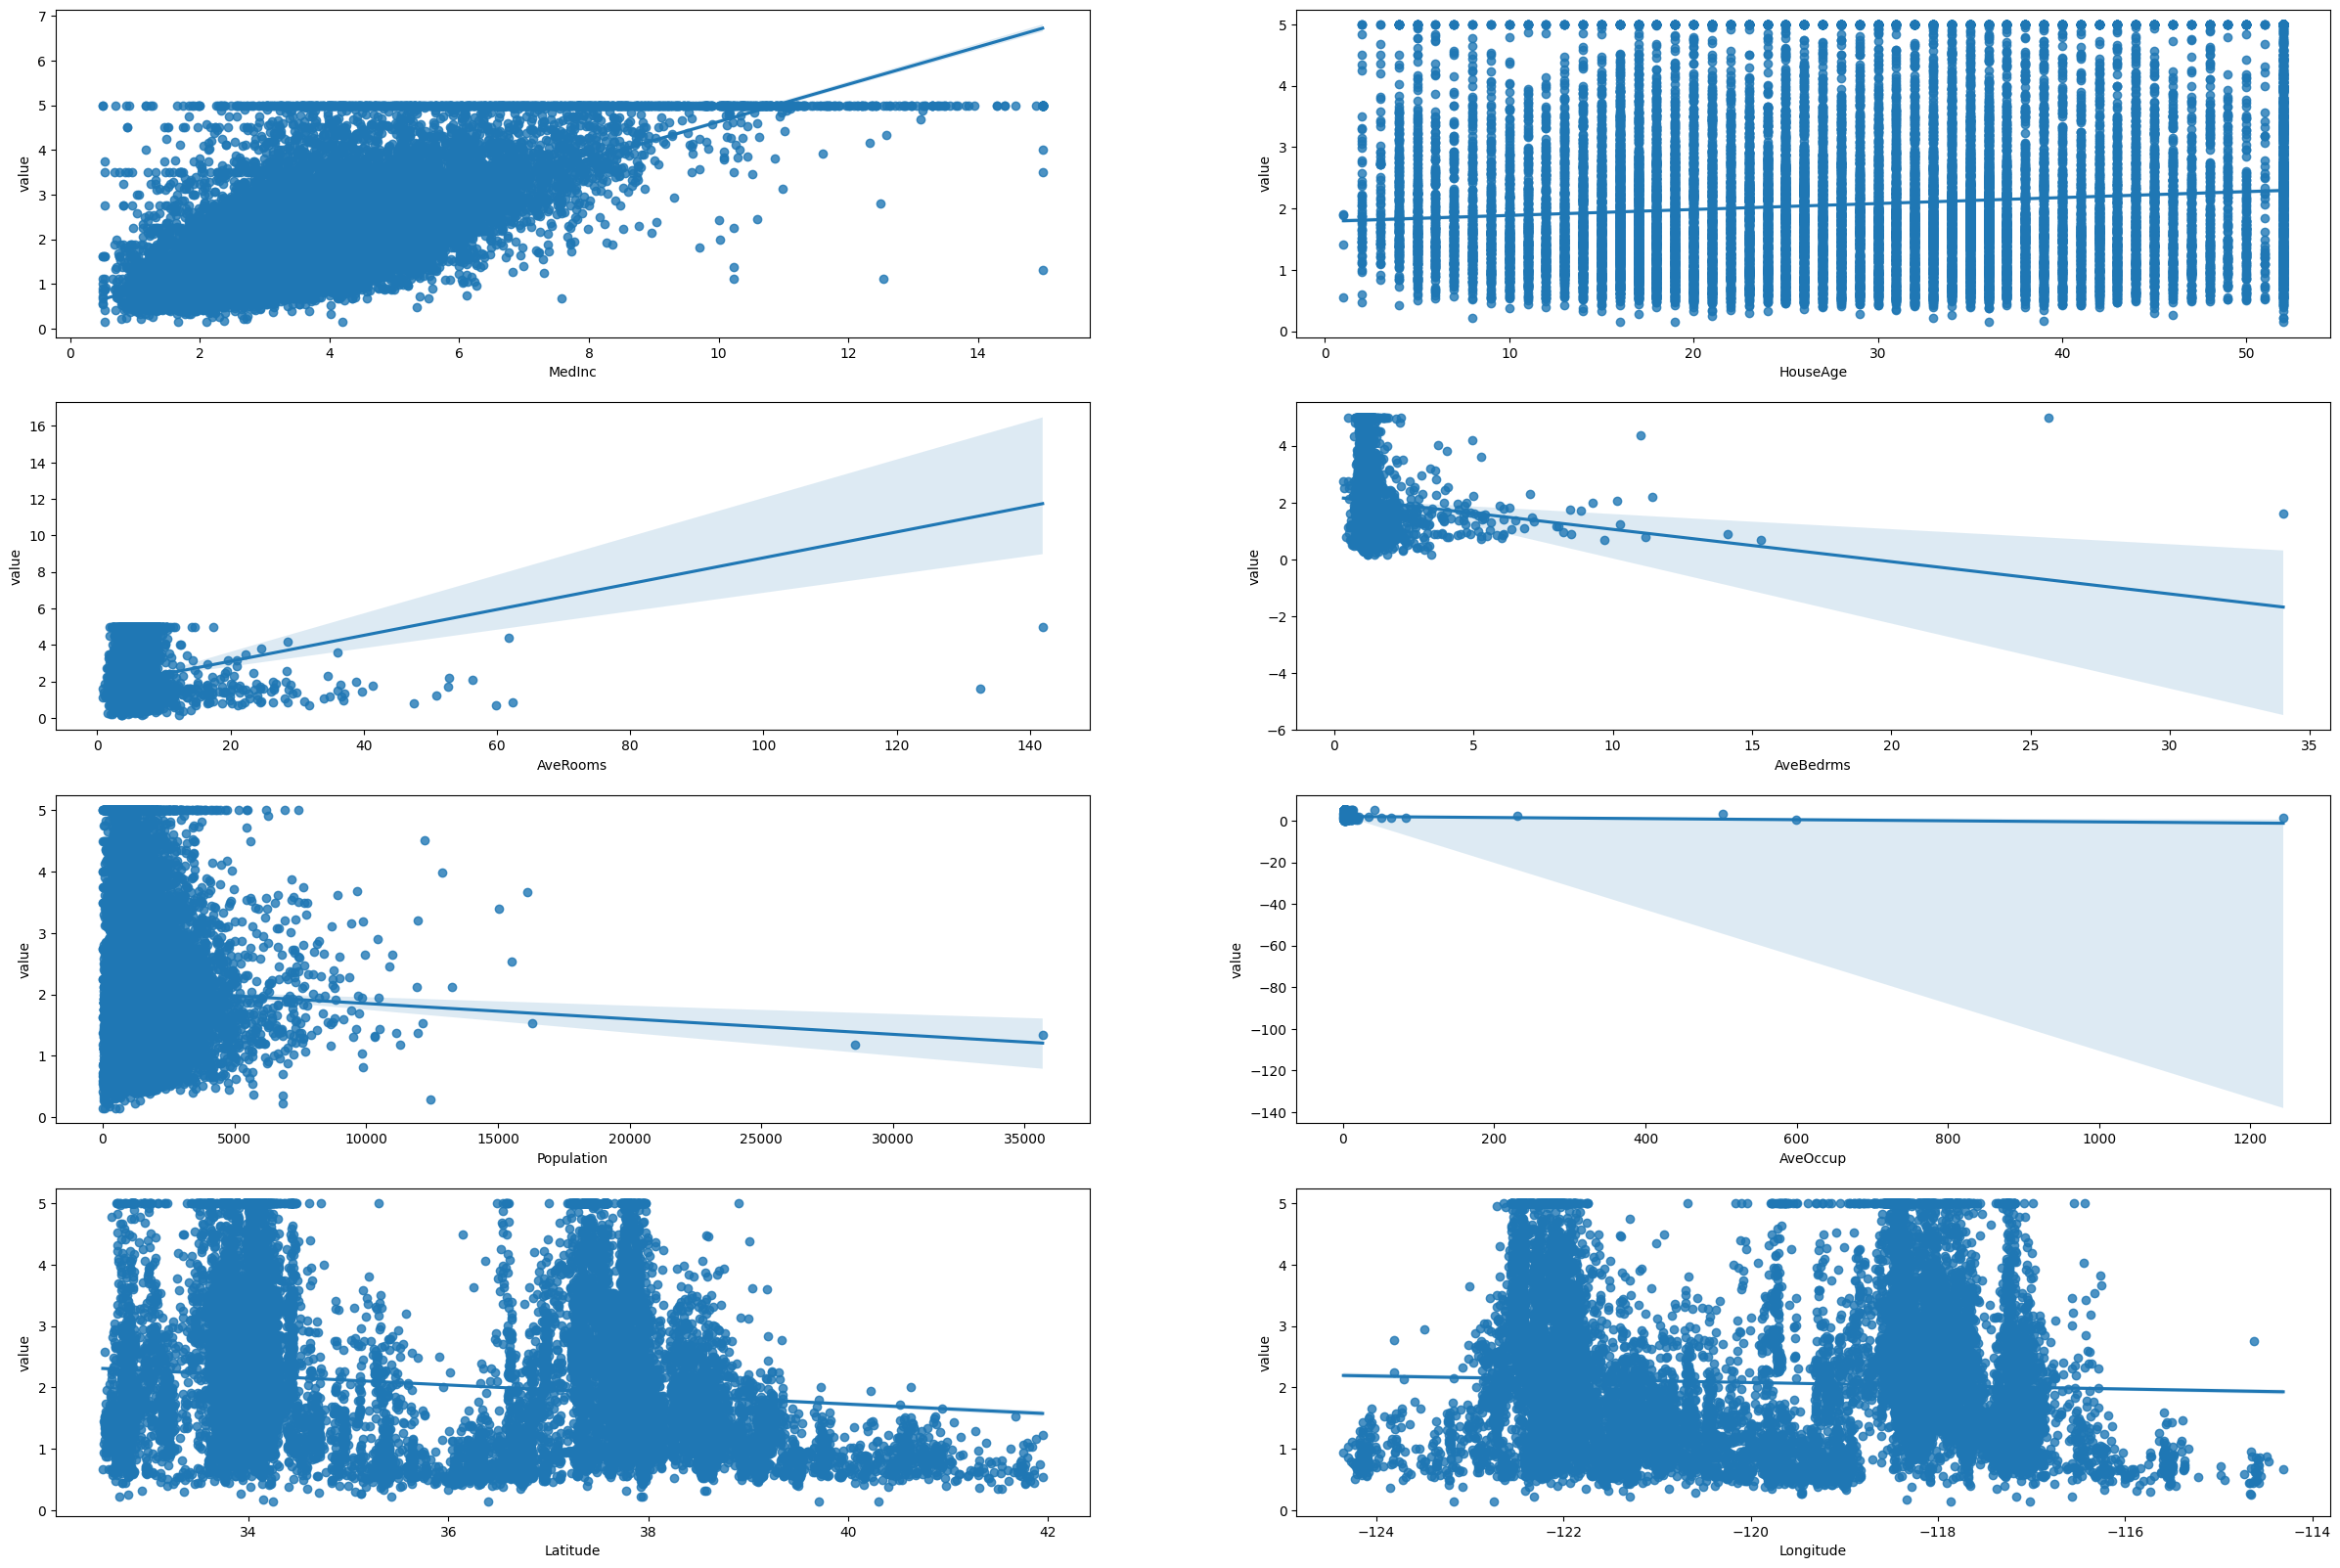

In [12]:
# 그래프 8개 생성 -> 독립변수의 개수
fig, axes = plt.subplots( nrows=4, ncols=2, figsize=(30, 20) )

for i in range(len(df.columns) - 1):

    sns.regplot(x = df.iloc[:, i], y = df['value'], 
                    ax = axes[i//2][i%2], data=df)

plt.show()


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- 연습 
    - df를 train과 test로 8:2의 비율로 나눠준다. 
        - target 데이터는 value 컬럼의 데이터
        - random_state는 42
    - Max Abs Scaler를 이용하여 데이터 스케일링 
    

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

In [15]:
df['value'].value_counts()

value
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('value', axis=1), 
    df['value'], 
    test_size= 0.2, 
    random_state=42
)

In [17]:
# class 생성 
MaScaler = MaxAbsScaler()

In [18]:
# 범위 지정 
MaScaler.fit(x_train)

MaxAbsScaler()

In [19]:
x_train_sc = MaScaler.transform(x_train)
x_test_sc = MaScaler.transform(x_test)

In [21]:
# 모델 선택 : 선형 회귀 모델
from sklearn.linear_model import LinearRegression

In [22]:
linear = LinearRegression()

In [23]:
# 데이터 학습 -> 스케일링을 한 x_train, y_train
linear.fit(x_train_sc, y_train)

LinearRegression()

In [24]:
# 예측 -> 스케일링이 된 x_test 데이터를 입력
pred = linear.predict(x_test_sc)

In [25]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: value, Length: 4128, dtype: float64

In [26]:
pd.concat(
    [y_test.reset_index(drop=True), pd.Series(pred)], 
    axis=1
)

,value,0
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657
...,...,...
4123,2.63300,1.991746
4124,2.66800,2.249839
4125,5.00001,4.468770
4126,0.72300,1.187511


In [27]:
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, root_mean_squared_error

In [33]:
# 두개의 1차원 데이터의 차이를 구해서 절대값을 입히고 평균을 구해서 되돌려준다.
mae = mean_absolute_error(y_test, pred)
# 두개의 1차원 데이터의 차이를 구해서 제곱한 뒤 평균을 구해서 되돌려준다.
mse = mean_squared_error(y_test, pred)
# mse 루트를 씌운다.
rmse = np.sqrt(mse)
# y_test, pred 로그 변환 
y_log = np.log1p(y_test) # log(1 + y_test)
pred_log = np.log1p(pred) # log(1 + pred)
msle = np.mean( (y_log - pred_log) ** 2 )
rmse2 = root_mean_squared_error(y_test, pred)

# 결정계수 출력 
r2 = r2_score(y_test, pred)

C:\Users\moons\AppData\Local\Temp\ipykernel_9556\1337598354.py:9: RuntimeWarning: invalid value encountered in log1p
  pred_log = np.log1p(pred) # log(1 + pred)


In [31]:
print(
    f"""
        MAE : {mae}, 
        MSE : {mse}, 
        RMSE : {rmse}, 
        RMSE2 : {rmse2}, 
        MSLE : {msle}, 
        R2SCORE : {r2}
    """
)


        MAE : 0.5332001304956561, 
        MSE : 0.555891598695244, 
        RMSE : 0.7455813830127761, 
        RMSE2 : 0.7455813830127761, 
        MSLE : 0.054131265842305626, 
        R2SCORE : 0.5757877060324511
    


In [34]:
linear2 = LinearRegression()
linear2.fit(x_train, y_train)
pred2 = linear2.predict(x_test)

In [35]:
# 두개의 1차원 데이터의 차이를 구해서 절대값을 입히고 평균을 구해서 되돌려준다.
mae = mean_absolute_error(y_test, pred2)
# 두개의 1차원 데이터의 차이를 구해서 제곱한 뒤 평균을 구해서 되돌려준다.
mse = mean_squared_error(y_test, pred2)
# mse 루트를 씌운다.
rmse = np.sqrt(mse)
# y_test, pred 로그 변환 
y_log = np.log1p(y_test) # log(1 + y_test)
pred_log = np.log1p(pred2) # log(1 + pred)
msle = np.mean( (y_log - pred_log) ** 2 )

# 결정계수 출력 
r2 = r2_score(y_test, pred2)

C:\Users\moons\AppData\Local\Temp\ipykernel_9556\3702085292.py:9: RuntimeWarning: invalid value encountered in log1p
  pred_log = np.log1p(pred2) # log(1 + pred)


In [36]:
print(
    f"""
        MAE : {mae}, 
        MSE : {mse}, 
        RMSE : {rmse}, 
        RMSE2 : {rmse2}, 
        MSLE : {msle}, 
        R2SCORE : {r2}
    """
)


        MAE : 0.533200130495656, 
        MSE : 0.555891598695244, 
        RMSE : 0.7455813830127761, 
        RMSE2 : 0.7455813830127761, 
        MSLE : 0.05413126584230592, 
        R2SCORE : 0.5757877060324511
    
